# K-Means Clustering Across Real and Synthetic Datasets

## Overview

In this project, I implemented K-Means clustering across multiple datasets to explore its applications in unsupervised learning. Using Python and scikit-learn, I clustered data from the Palmer penguins dataset, Titanic passengers, and synthetic datasets. This project showcases how clustering can be applied to real-world and simulated data to uncover patterns and segment observations.

## Project Goals

1. Apply K-Means clustering to different datasets with varying preprocessing techniques (e.g., standardization).
2. Visualize the clusters to understand the underlying patterns.
3. Evaluate and interpret the clustering results, determining appropriate values for *k* and assessing the quality of clusters.

In [10]:
import numpy as np
import pandas as pd

## Penguins data



Recall the Palmer penguins data set.

In [11]:
df_penguins = pd.read_csv("https://dlsun.github.io/stats112/data/penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Initial Clustering with k=2 (Without Standardization)

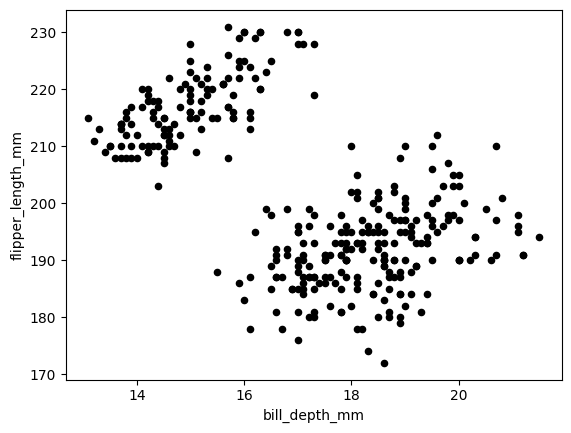

In [12]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     color="black");

To start, I clustered the penguins into two groups using K-Means without standardizing the features. The scatterplot below shows the cluster assignments, with points colored based on their respective clusters.

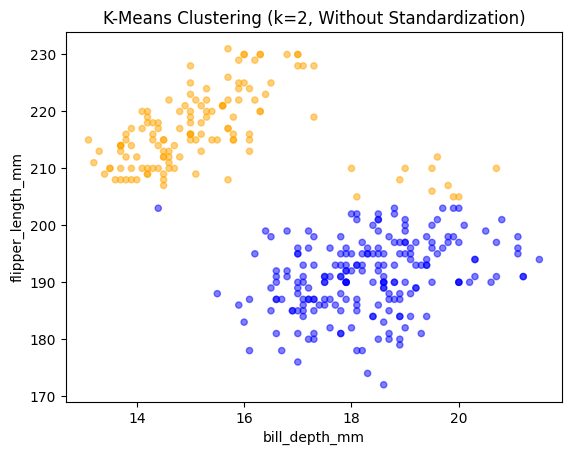

In [29]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

model = KMeans(n_clusters=2, random_state=42)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({0: "orange", 1: "blue"})

X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", c=clusters, alpha=0.5)
plt.title("K-Means Clustering (k=2, Without Standardization)")
plt.show()

## Findings

The resulting clusters seemed unbalanced because the two features, bill depth and flipper length, are on different scales. This caused the clustering to be skewed, with flipper length dominating the results.

## Clustering with k=2 (With Standardization)

To address the scaling issue, I standardized the features before applying K-Means clustering. This ensured that both features contributed equally to the clustering process.

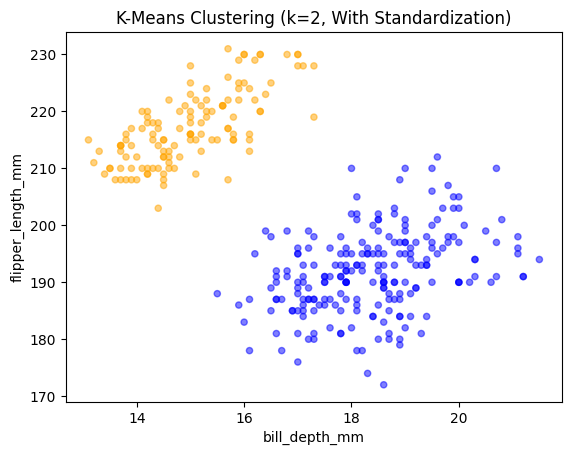

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

model = KMeans(n_clusters=2, random_state=42)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({0: "orange", 1: "blue"})

X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", c=clusters, alpha=0.5)
plt.title("K-Means Clustering (k=2, With Standardization)")
plt.show()


**We can see that this scatter plot is what one would inherently expect to see. It seems that the standardized model seems to be more apporriate here.**

## Findings

The clusters after standardization were more balanced and aligned better with natural divisions in the data. This confirmed that standardization is crucial for clustering when features have different scales.

## Clustering with k=3 (With Standardization)

Next, I increased k to 3 to capture finer distinctions among the penguins, potentially corresponding to the three species in the dataset (Adelie, Gentoo, and Chinstrap).

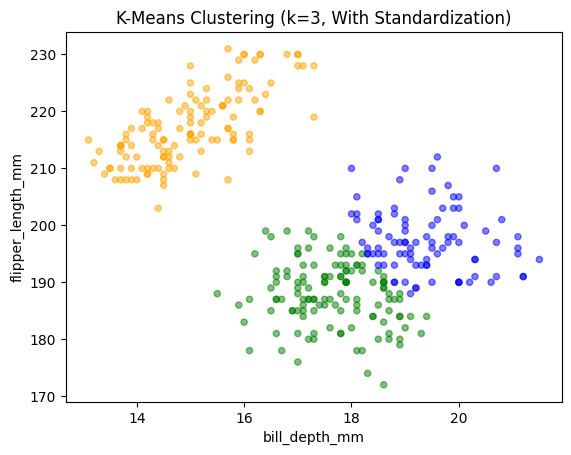

In [31]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({0: "orange", 1: "blue", 2: "green"})

X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", c=clusters, alpha=0.5)
plt.title("K-Means Clustering (k=3, With Standardization)")
plt.show()


## Interpretation of the Clusters in Context

Here the clusters could represent species.

The clusters are likely driven by natural differences in size and proportions among the species. By standardizing the features before clustering, we ensure that neither bill depth nor flipper length disproportionately influences the results, leading to clusters that better reflect true biological distinctions.

To confirm what the clusters represent, you could compare the clustering results to the actual species labels in the dataset, using them as a reference point to assess the alignment between the clusters and species.

## Predicting the Cluster of a New Penguin

Using the k=2 standardized model, I predicted the cluster for a penguin with a bill depth of 15 mm and a flipper length of 210 mm.

In [32]:
model.predict([[15, 210]])

array([0], dtype=int32)

## Result

The model predicted that the penguin belongs to the orange cluster, aligning with the expected result based on the scatterplot.

## Determining the Appropriate Value of k=2:

This value captures broader groupings but oversimplifies the clustering, potentially merging distinct species into the same group.
k=3: This value aligns better with the biological knowledge of the dataset, as it reflects the three species of penguins.
Conclusion
Based on the dataset and prior knowledge,k=3 is the more appropriate choice. It captures the natural divisions in the data and provides meaningful clusters that align with biological distinctions.

## Titanic Data (DO THIS ONE LAST)

Use $k$-means to cluster the Titanic passengers into $k$ clusters. You are free to choose the number of clusters $k$, but try at least two different values of $k$. You are also free to choose the features to include, but be sure to include both categorical and quantitative features.

Summarize the results to create "profiles" of the passengers in each cluster. Can you come up with an "interpretation" of each cluster based on the passengers in it?

Note: before we have classified the passengers based on whether or not they survived, but here we are just trying to cluster the passengers; we're not necessarily trying to predict whether they survived or died.

In [ ]:
df_titanic = pd.read_csv("https://dlsun.github.io/pods/data/titanic.csv ")

df_titanic

In [ ]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT

## Mystery data

The following data set contains mystery observations on variables x and y. Use k-means clustering with k=6 to cluster the data; you do not need to scale x and y. Then plot the observations colored by cluster. What is the mystery data? What are the clusters? Did the clustering algorithm do a good job?

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/refs/heads/main/data/cluster_mystery.csv")

<Axes: xlabel='x', ylabel='y'>

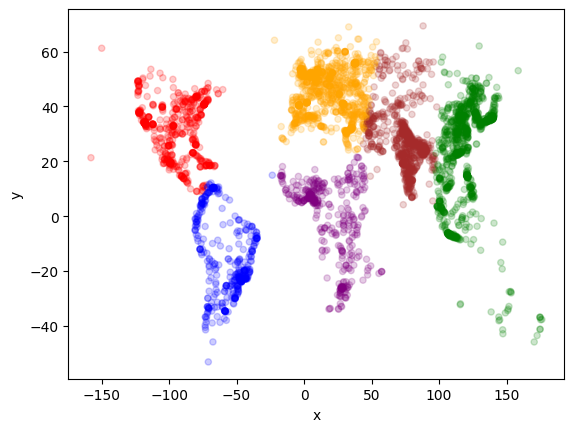

In [23]:
X_train = df[["x", "y"]].dropna()

model = KMeans(n_clusters=6)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red",
    4: "purple",
    5: "brown",
    6: "pink"
})

X_train.plot.scatter(x="x", y="y",
                     c=clusters, alpha=0.2)


## Synthetic Data Sets

1\. The code below reads in the "two moons" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should be the two clusters be _intuitively_? What do you think $k$-means will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

<Axes: xlabel='x1', ylabel='x2'>

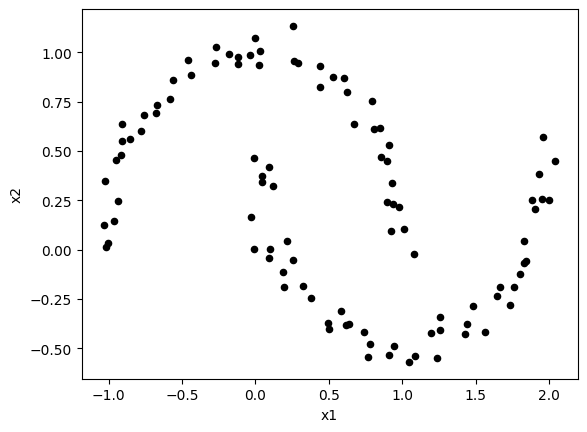

In [24]:
moons = pd.read_csv("https://dlsun.github.io/pods/data/two_moons.csv")
moons.plot.scatter(x="x1", y="x2", color="k")

**Intuitively, I would say that the clusters should be at the apex of both of the curves. But I think that the k-means algorithm will split the data in half.**

<Axes: xlabel='x1', ylabel='x2'>

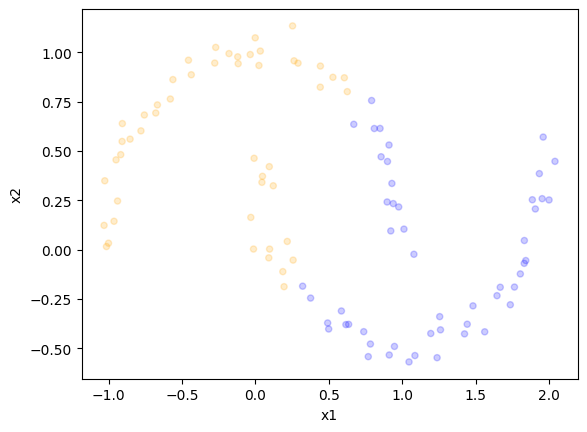

In [26]:
X_train = moons[["x1", "x2"]].dropna()

model = KMeans(n_clusters=2)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="x1", y="x2",
                     c=clusters, alpha=0.2)

2\. The code below reads in the "satellite" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should the two clusters be _intuitively_? What will the clusters be if you ask $k$-means to cluster this data into 2 clusters? Once you have a hypothesis, test it out by running $k$-means on this dataset.

<Axes: xlabel='x1', ylabel='x2'>

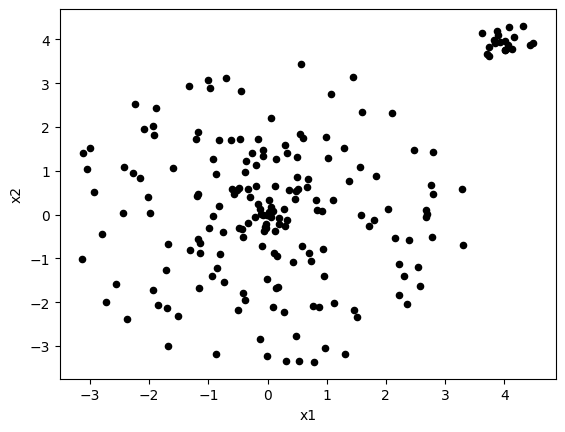

In [27]:
satellite = pd.read_csv("https://dlsun.github.io/pods/data/satellite.csv")
satellite.plot.scatter(x="x1", y="x2", color="black")

**Intuitively the clusters will be the two different groups of data points, (larger and smaller circular groups). I think that the larger group of data will be borken up, meaning that some of the data closer to the smaller circle will be captured by that group**

<Axes: xlabel='x1', ylabel='x2'>

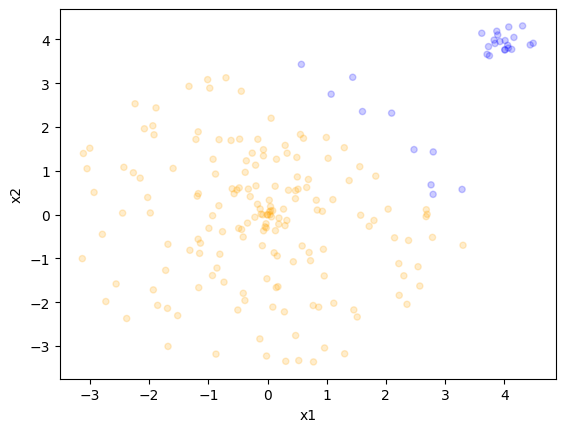

In [28]:
X_train = satellite[["x1", "x2"]].dropna()

model = KMeans(n_clusters=2)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="x1", y="x2",
                     c=clusters, alpha=0.2)